In [1]:
using Revise, HarmonicBalance
@variables α, ω, ω0, F, t, η, γ, x(t); # declare constant variables and a function x(t)

┌ Info: Precompiling HarmonicBalance [e13b9ff6-59c3-11ec-14b1-f3d2cc6c135e]
└ @ Base loading.jl:1662


In [2]:
# define ODE 
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + α*x^3 + γ*d(x,t) ~ F*cos(5*ω*t), x)

# specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, ω) 
add_harmonic!(diff_eq, x, 3*ω)
add_harmonic!(diff_eq, x, 5*ω) 

System of 1 differential equations
Variables:       x(t)
Harmonic ansatz: x(t) => ω, 3ω, 5ω;   

α*(x(t)^3) + (ω0^2)*x(t) + γ*Differential(t)(x(t)) + Differential(t)(Differential(t)(x(t))) ~ F*cos(5t*ω)


In [3]:
# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 6 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T), u3(T), v3(T)
Parameters: α, ω, ω0, γ, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt) + u2(T)*cos(3ωt) + v2(T)*sin(3ωt) + u3(T)*cos(5ωt) + v3(T)*sin(5ωt)

Harmonic equations:

(ω0^2)*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//2)*α*(u2(T)^2)*u1(T) + (3//2)*α*(u3(T)^2)*u1(T) + (3//4)*α*(u1(T)^2)*u2(T) + (3//4)*α*(v1(T)^2)*u1(T) + (3//4)*α*(u2(T)^2)*u3(T) + (3//2)*α*(v2(T)^2)*u1(T) + (3//2)*α*(v3(T)^2)*u1(T) + (3//2)*α*u1(T)*u2(T)*u3(T) + (3//2)*α*u1(T)*v1(T)*v2(T) + (3//2)*α*u1(T)*v2(T)*v3(T) + (3//2)*α*u2(T)*v1(T)*v3(T) + (3//2)*α*u2(T)*v2(T)*v3(T) - (ω^2)*u1(T) - (3//4)*α*(v1(T)^2)*u2(T) - (3//4)*α*(v2(T)^2)*u3(T) - (3//2)*α*u3(T)*v1(T)*v2(T) ~ 0

γ*Differential(T)(v1(T)) + (ω0^2)*v1(T) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) + (3//2)*α*(u2(T)^2)*v1(T) + (3//4)*α*(u1(T)^2)*v2(T) + (3//4)*α*(v2(T)^2)*v3(T) + (3//2)*α*(u3(T)^2)*v1(T) + (3//

# drive near resonance

In [4]:
fixed = (α => 1., ω0 => 1.0, F => 0.5, γ=>0.0001)   # fixed parameters
varied = ω => LinRange(0.9, 1.2, 100)              # range of parameter values
result = get_steady_states(harmonic_eq, varied, fixed)

Solving for 100 parameters... 100%|█████████████████████| Time: 0:00:01
  # parameters solved:  100
  # paths tracked:      15300


A steady state result for 100 parameter points

Solution branches:   153
   of which real:    13
   of which stable:  7

Classes: stable, physical, Hopf, binary_labels


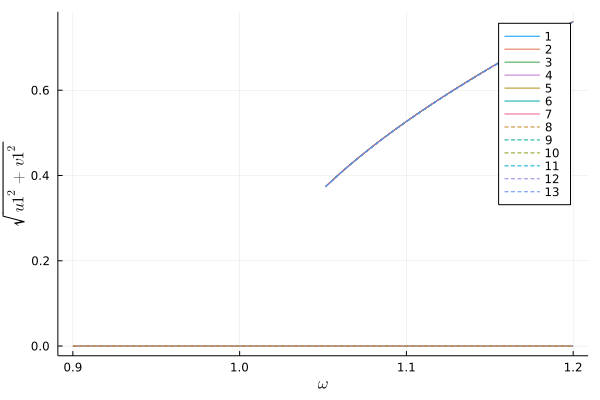

In [14]:
plot(result, x="ω", y="sqrt(u1^2 + v1^2)")

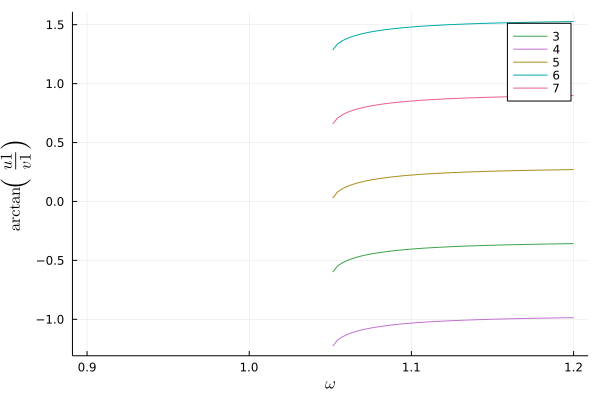

In [53]:
classify_solutions!(result, "sqrt(u1^2 + v1^2) > 1E-10", "nonzero")
plot(result, x="ω", y="atan(u1/v1)", class=["physical", "stable", "nonzero"])